<a href="https://colab.research.google.com/github/abdelkadergelany/Machine-Learning/blob/master/Implementing%20Support%20Vector%20Machine%20%20Classifier%20and%20Tuning%20Hyper-parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

**TASK 1**

In [ ]:
file = r'/content/Iris1.xlsx'
iris = pd.read_excel(file)
X = iris.iloc[:, :4]
y = iris.Species

**Standardization**

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                       X_scaled, y, test_size=0.3, random_state=42)

**TASK 2**

**Linear SVM**

In [ ]:
from sklearn import svm 
clf = svm.SVC(kernel='linear',degree=3, C=100).fit(X_train,y_train)

**PRINT LINEAR ACCURACY**

In [ ]:
print('Accuracy of linear SVC on training set: {:.2f}'.format(clf.score(X_train, y_train)))

print('Accuracy of linear SVC on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of linear SVC on training set: 0.97
Accuracy of linear SVC on test set: 1.00


**display its accuracy report**

In [ ]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, clf.predict(X_test)
print( '\nClassification report\n' )
print(classification_report(y_true, y_pred))


Classification report

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



**Visualize the confusion matrix**

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


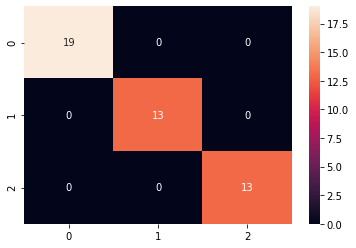

In [ ]:
from sklearn.metrics import confusion_matrix
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

**TASK 3 POLYNOMIAL KERNEL**

In [ ]:
poly_svc = svm.SVC(kernel='poly', degree=3, C=100).fit(X_train,y_train)

**DISPLAY ACCURACY**

In [ ]:
print('Accuracy of POLYNOMIAL on training set: {:.2f}'.format(poly_svc.score(X_train, y_train)))
print('Accuracy of POLYNOMIAL on test set: {:.2f}'.format(poly_svc.score(X_test, y_test)))

Accuracy of POLYNOMIAL on training set: 0.98
Accuracy of POLYNOMIAL on test set: 1.00


**classification_report**

In [ ]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, poly_svc.predict(X_test)
print( '\nClassification report\n' )
print(classification_report(y_true, y_pred))


Classification report

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



**Visualize the confusion matrix**

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


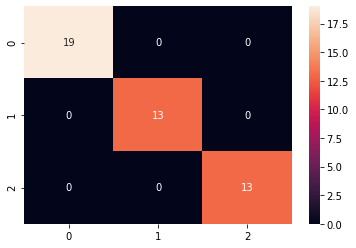

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

**TASK 4**

**TRAIN WITH RBF**

In [ ]:
 
rbf = svm.SVC(kernel='rbf', gamma=0.7, C=100).fit(X_train,y_train)

**DISPLAY RBF ACCURACY**

In [ ]:
print('Accuracy of RBF on training set: {:.2f}'.format(rbf.score(X_train, y_train)))
print('Accuracy of RBF on test set: {:.2f}'.format(rbf.score(X_test, y_test)))

Accuracy of RBF on training set: 1.00
Accuracy of RBF on test set: 0.96


**classification_report**

In [ ]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, rbf.predict(X_test)
print( '\nClassification report\n' )
print(classification_report(y_true, y_pred))


Classification report

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



**Visualize the confusion matrix**

[[19  0  0]
 [ 0 12  1]
 [ 0  1 12]]


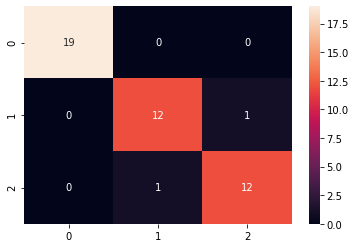

In [ ]:
 labels = ['Iris-setosa', 'Iris-versicolor','Iris-virginica']

cf_matrix = confusion_matrix(y_test, y_pred,labels = labels)
print(cf_matrix)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

**TASK 5**

In [ ]:
from sklearn.model_selection import GridSearchCV 

# defining parameter range 
# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
# 			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
# 			'kernel': ['rbf']} 

param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},{'kernel': ['poly'], 'C': [1, 10, 100, 1000]}]


grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(X_train, y_train) 


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.333, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.333, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.333, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.333, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.476, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.333, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................. C=1000, kernel=poly, score=0.857, total=   0.0s
[CV] C=1000, kernel=poly .............................................
[CV] ................. C=1000, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, kernel=poly .............................................
[CV] ................. C=1000, kernel=poly, score=0.952, total=   0.0s


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 


{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
